                                                                                                                Arunjith PM

#             Jamboree Education - Linear Regression

## About Jamboree

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problemsolving methods ensure maximum scores with minimum effort. They recently launched a feature where students/learners can come to
their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission
from an Indian perspective.


Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

## Column Profiling

- 	Serial No. (Unique row ID)
-	GRE Scores (out of 340)
-	TOEFL Scores (out of 120)
-	University Rating (out of 5)
-	Statement of Purpose and Letter of Recommendation Strength (out of 5)
-	Undergraduate GPA (out of 10)
-	Research Experience (either 0 or 1)
-	Chance of Admit (ranging from 0 to 1)


## Problem Statement


- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
- Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding
based on row numbers.
- Use Non-graphical and graphical analysis for getting inferences about variables.
> This can be done by checking the distribution of variables of graduate applicants.
- Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
- Check correlation among independent variables and how they interact with each other.
- Use Linear Regression from (Statsmodel library) and explain the results.
- Test the assumptions of linear regression:
> Multicollinearity check by VIF score                            
> Mean of residuals                                     
> Linearity of variables (no pattern in residual plot)                                    
> Test for Homoscedasticity                                         
> Normality of residuals                      
- Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
- Provide actionable Insights & Recommendations
- Try out different Linear Regressions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [130]:
df = pd.read_csv("Jamboree_Admission.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


## 1.Identification of variables and data types:

In [3]:
df.set_index('Serial No.',inplace=True)

In [4]:
df.shape

(500, 8)

- Data contains 500 rows and 8 columns

In [5]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


- All columns are numercal

## 2.Analysing the basic metrics:

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- mean and median are almost same. there is less chance of outlayer

#### Checking null values

In [8]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- Our data dosn't have any null values

### Non-Graphical Analysis: 

In [9]:
#number of unique values in our data
for i in df.columns:
 print(i,'minimum',':',min(df[i]))
 print(i,'maximum',':',max(df[i]))

GRE Score minimum : 290
GRE Score maximum : 340
TOEFL Score minimum : 92
TOEFL Score maximum : 120
University Rating minimum : 1
University Rating maximum : 5
SOP minimum : 1.0
SOP maximum : 5.0
LOR  minimum : 1.0
LOR  maximum : 5.0
CGPA minimum : 6.8
CGPA maximum : 9.92
Research minimum : 0
Research maximum : 1
Chance of Admit  minimum : 0.34
Chance of Admit  maximum : 0.97


In [10]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


- Data contains 5 Unique University Rating
- Research have 2 unique values

In [11]:
for i in df.columns:
    print(i,':',df[i].value_counts(normalize=True)*100)

GRE Score : 312    4.8
324    4.6
316    3.6
321    3.4
322    3.4
327    3.4
311    3.2
320    3.2
314    3.2
317    3.0
325    3.0
315    2.6
308    2.6
323    2.6
326    2.4
319    2.4
313    2.4
304    2.4
300    2.4
318    2.4
305    2.2
301    2.2
310    2.2
307    2.0
329    2.0
299    2.0
298    2.0
331    1.8
340    1.8
328    1.8
309    1.8
334    1.6
332    1.6
330    1.6
306    1.4
302    1.4
297    1.2
296    1.0
295    1.0
336    1.0
303    1.0
338    0.8
335    0.8
333    0.8
339    0.6
337    0.4
290    0.4
294    0.4
293    0.2
Name: GRE Score, dtype: float64
TOEFL Score : 110    8.8
105    7.4
104    5.8
107    5.6
106    5.6
112    5.6
103    5.0
100    4.8
102    4.8
99     4.6
101    4.0
111    4.0
108    3.8
113    3.8
109    3.8
114    3.6
116    3.2
115    2.2
118    2.0
98     2.0
119    2.0
120    1.8
117    1.6
97     1.4
96     1.2
95     0.6
93     0.4
94     0.4
92     0.2
Name: TOEFL Score, dtype: float64
University Rating : 3    32.4
2    25.2
4    21.0


In [12]:
#checking the occurences of each of the University Rating
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

- University Rating 1 is the least number
- second least Rating is 5 
- Remaining University counts are almost same

In [13]:
#checking the occurences of each of the Statement of purpose
df['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

- Statement of purpose varies from 1 to 5
- Counts of Statement of purpose less for lesser values 1, 1.5

In [14]:
#checking the occurences of each of the letter of recommentation
df['LOR '].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

- letter of recommentation varies from 1 to 5
- Counts of letter of recommentation less for lesser values 1, 1.5
- Counts are high for Rating 3 to 4.5

In [15]:
#checking the occurences of each of the Research
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

- Most peoples are done their Research

## Checking for unique variable

In [16]:
df.duplicated().sum()

0

- Data dosn't have any null values

# Visual Analysis:

## Univariate analysis

## Distribution Variables 

In [17]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

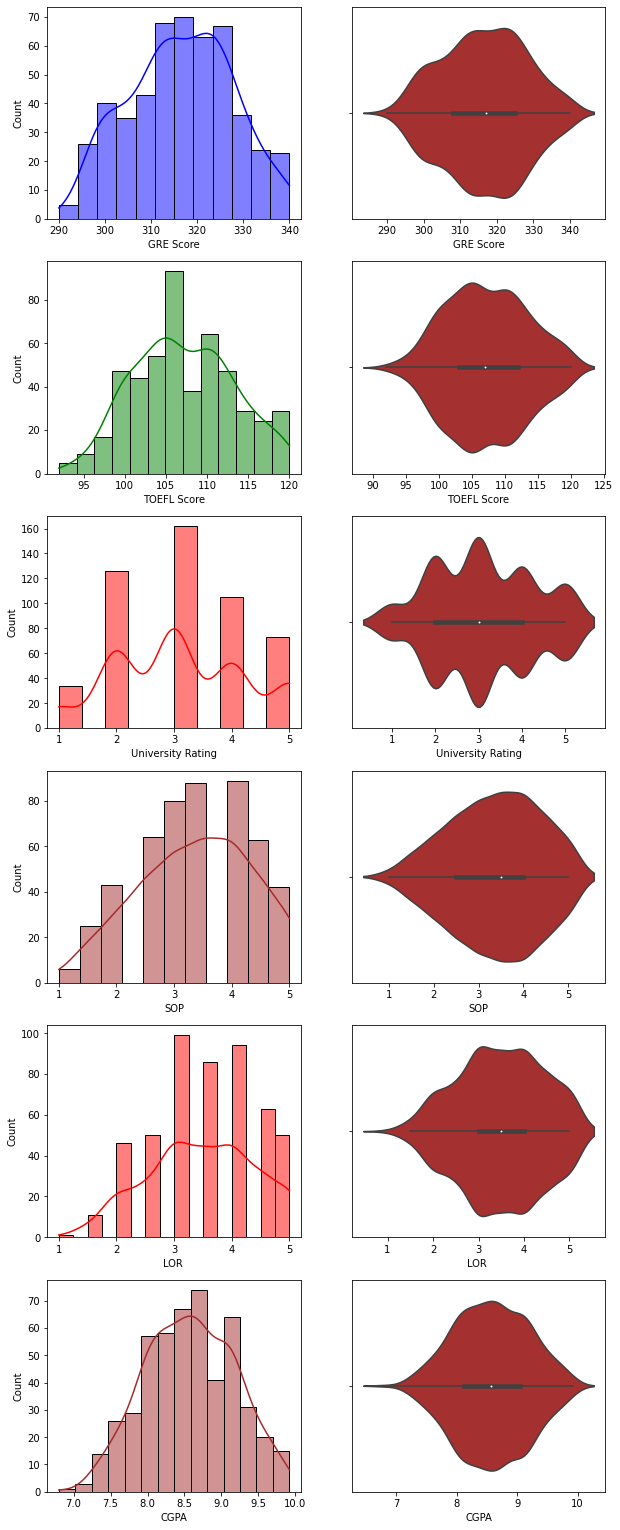

In [18]:
fig, axis = plt.subplots(nrows=6, ncols=2, figsize=(10,15))
fig.subplots_adjust(top=1.5)
sns.histplot(data=df, x="GRE Score", kde=True,color="blue", ax=axis[0,0])
sns.violinplot(x="GRE Score", data=df,color='#B22222',saturation=0.8, ax=axis[0,1])
sns.histplot(data=df, x="TOEFL Score", kde=True,color="green", ax=axis[1,0])
sns.violinplot(x="TOEFL Score", data=df,color='#B22222',saturation=0.8, ax=axis[1,1])
sns.histplot(data=df, x="University Rating", kde=True,color="red", ax=axis[2,0])
sns.violinplot(x="University Rating", data=df,color='#B22222',saturation=0.8, ax=axis[2,1])
sns.histplot(data=df, x="SOP", kde=True,color="brown", ax=axis[3,0])
sns.violinplot(x="SOP", data=df,color='#B22222',saturation=0.8, ax=axis[3,1])
sns.histplot(data=df, x="LOR ", kde=True,color="red", ax=axis[4,0])
sns.violinplot(x="LOR ", data=df,color='#B22222',saturation=0.8, ax=axis[4,1])
sns.histplot(data=df, x="CGPA", kde=True,color="brown", ax=axis[5,0])
sns.violinplot(x="CGPA", data=df,color='#B22222',saturation=0.8, ax=axis[5,1])
plt.show()

- Values of University Rating,LOR, SOP are ranges from 0 to 5
- CGPA is ranges from 0 to 5
- GRE score ranges from 290 to 340
- Tofel score ranges from 90 to 120

## University rating Distribution

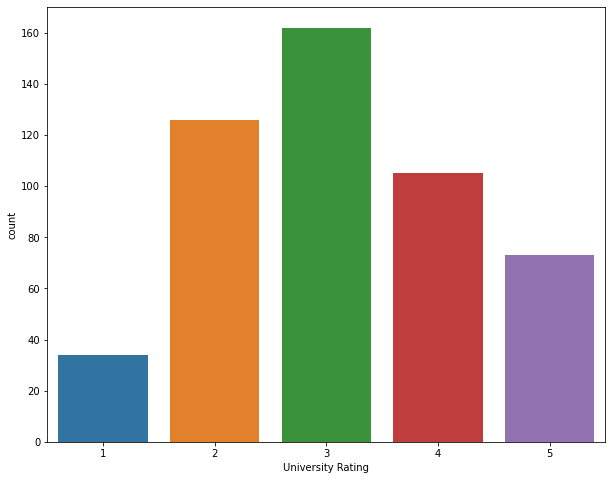

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'University Rating', data = df)
plt.show()

- University 3 is the most repeating in our data

## SOP Distribution

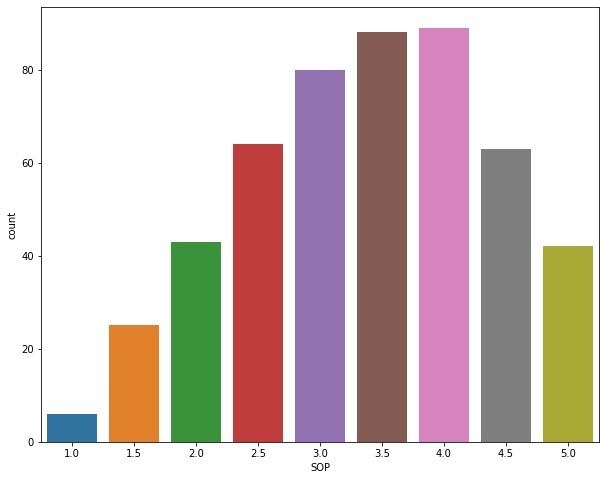

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'SOP', data = df)
plt.show()

## Research Done by Applicants

<AxesSubplot:ylabel='Research'>

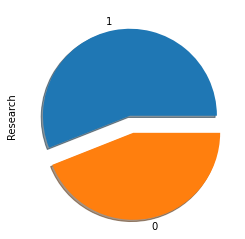

In [21]:
df.Research.value_counts().plot(kind='pie',shadow=True,explode=(0,0.2))

- Most of the applicants are Done the Research

## Variation of LOR 

C:\Users\I Am Guest\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


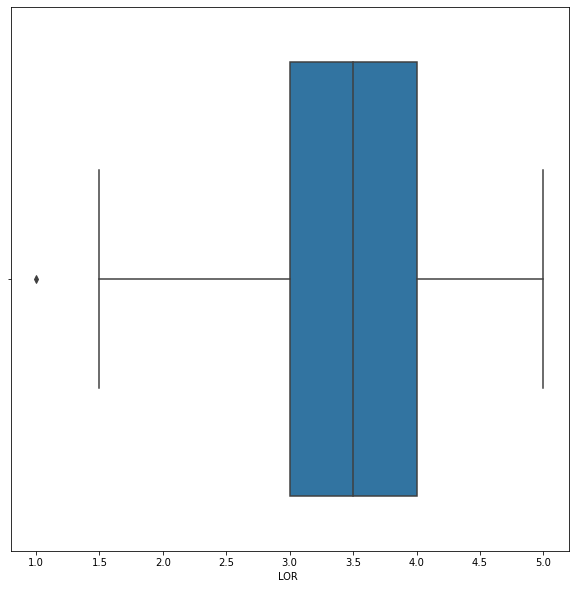

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(df['LOR '])
plt.show()

- Most of the values of LOR are between 3 to 4

## Bivariate Analysis:

## which university have high average GRE score

In [23]:
df.groupby('University Rating')['GRE Score'].mean()

University Rating
1    304.911765
2    309.134921
3    315.030864
4    323.304762
5    327.890411
Name: GRE Score, dtype: float64

- university rating 5 has most avg GRE score
- university rating 1 has least avg GRE score

<AxesSubplot:xlabel='University Rating'>

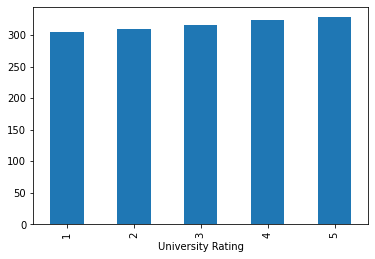

In [24]:
df.groupby('University Rating')['GRE Score'].mean().plot(kind='bar')

- Mean GRE score incresing with University rating

## which university have high average TOEFL Score

In [25]:
df.groupby('University Rating')['TOEFL Score'].mean()

University Rating
1    100.205882
2    103.444444
3    106.314815
4    110.961905
5    113.438356
Name: TOEFL Score, dtype: float64

- university rating 5 has most avg TOEFL Score
- university rating 1 has least avg TOEFL Score

<AxesSubplot:xlabel='University Rating'>

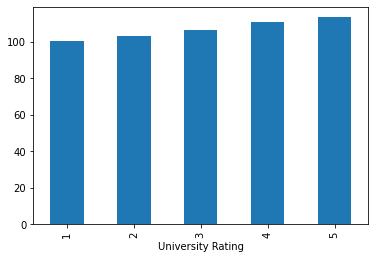

In [26]:
df.groupby('University Rating')['TOEFL Score'].mean().plot(kind='bar')

- Mean TOEFL Score incresing with University rating

## which university have high average SOP 

In [27]:
df.groupby('University Rating')['SOP'].mean()

University Rating
1    1.941176
2    2.682540
3    3.308642
4    4.000000
5    4.479452
Name: SOP, dtype: float64

- university rating 5 has most avg SOP
- university rating 1 has least avg SOP

<AxesSubplot:xlabel='University Rating'>

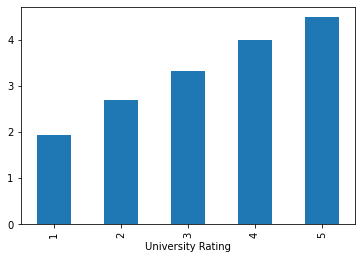

In [28]:
df.groupby('University Rating')['SOP'].mean().plot(kind='bar')

- Mean SOP incresing with University rating

## which university have high average CGPA

In [29]:
df.groupby('University Rating')['CGPA'].mean()

University Rating
1    7.798529
2    8.177778
3    8.500123
4    8.936667
5    9.278082
Name: CGPA, dtype: float64

- university rating 5 has most avg CGPA
- university rating 1 has least avg CGPA

<AxesSubplot:xlabel='University Rating'>

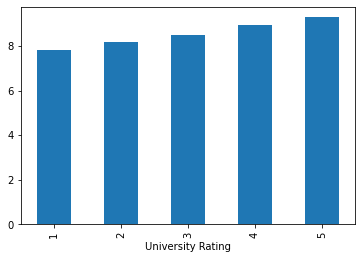

In [30]:
df.groupby('University Rating')['CGPA'].mean().plot(kind='bar')

- Mean SOP incresing with CGPA

## GRE score vs LOR

<AxesSubplot:xlabel='LOR ', ylabel='GRE Score'>

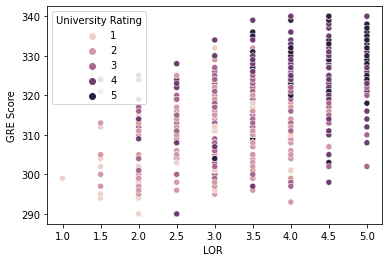

In [31]:
sns.scatterplot(x='LOR ',y='GRE Score',data=df,hue='University Rating')

- GRE Score increses with Letter of recommentation

## GRE score vs University Rating

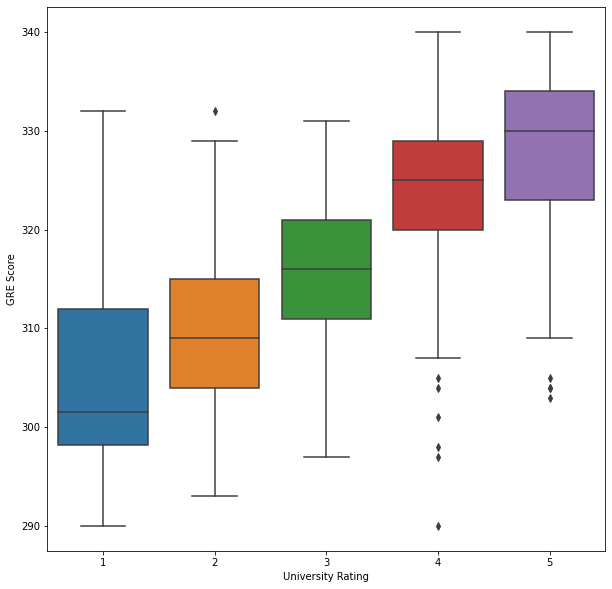

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'University Rating', y = 'GRE Score', data = df)
plt.show()

- For diffrent university rating GRE score ranges are diffrent
- university rating 1 has GRE score ranges from 290 to 350
- university rating 5 has GRE score ranges from 300 to 340

## TOEFL Score vs University Rating

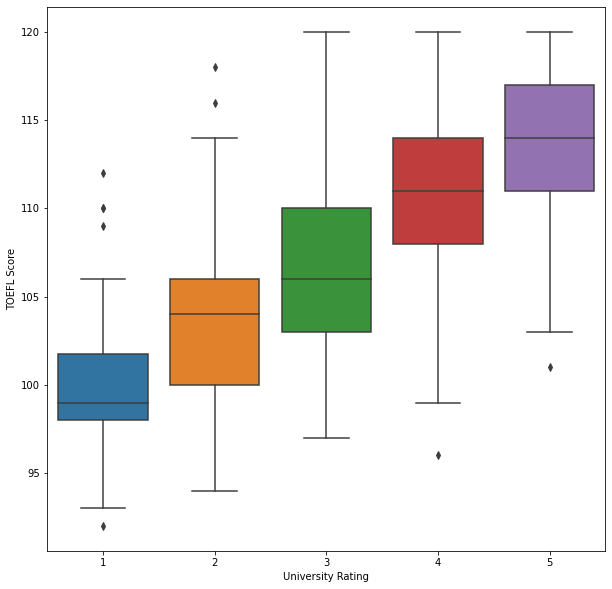

In [33]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'University Rating', y = 'TOEFL Score', data = df)
plt.show()

- For diffrent university rating GRE score ranges are diffrent
- university rating 1 has TOEFL Score ranges from 92 to 106
- university rating 5 has TOEFL Score ranges from 104 to 120

## GRE Score, TOEFL Score value diffrance

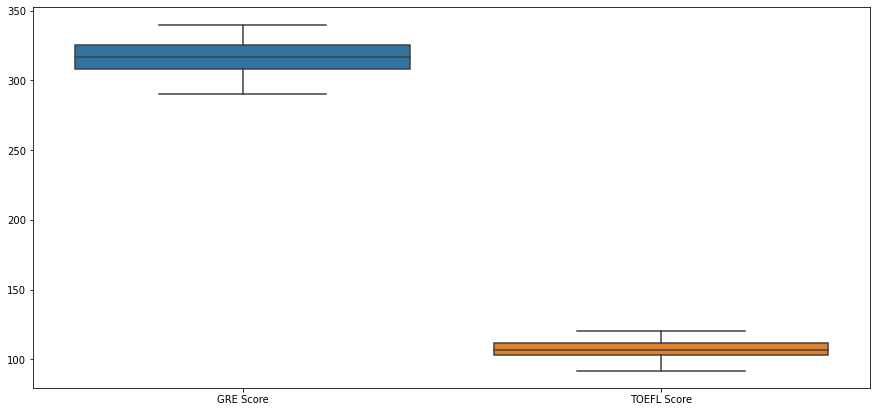

In [34]:
plt.figure(figsize=(15,7))
attrs=['GRE Score','TOEFL Score']
sns.boxplot(data=df[['GRE Score','TOEFL Score']])
plt.show()

> value range of GRE Score, TOEFL Score are very diffrent

In [35]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

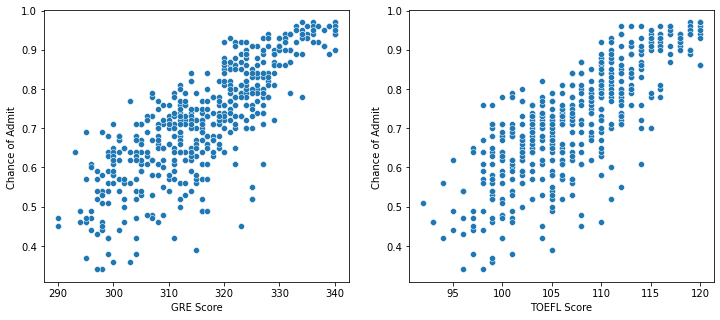

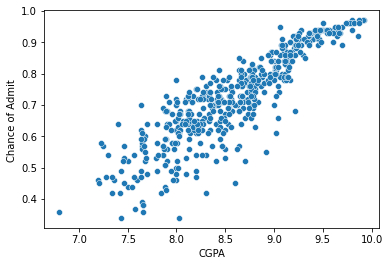

In [36]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit '
# check relation bw continuous variables & target variable
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x=num_cols[0], y=target, data=df, ax=axs[0])
sns.scatterplot(x=num_cols[1], y=target, data=df, ax=axs[1])
plt.show()
sns.scatterplot(x=num_cols[2], y=target, data=df)
plt.show()


- Seems like there is a linear correlation between the continuous variables and the target variable.


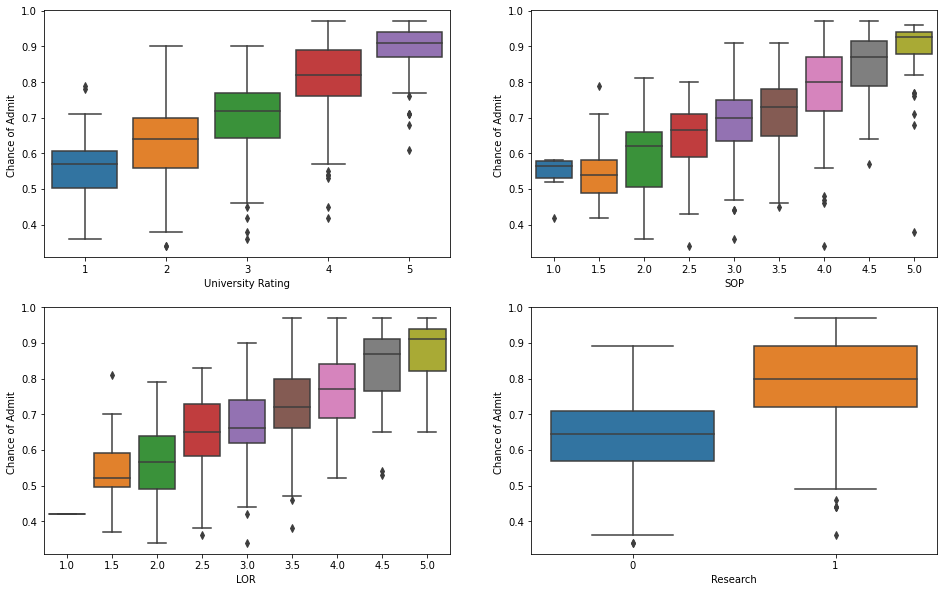

In [37]:
rows,cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=df, ax=axs[row,col])
        index += 1


- As you can see from the graphs, as tge rating increases the Chance of Admit also increases.
- Students who have the research experience have more chances of Admin as compared to other students who don't have the
research experience.


## Relation between variables

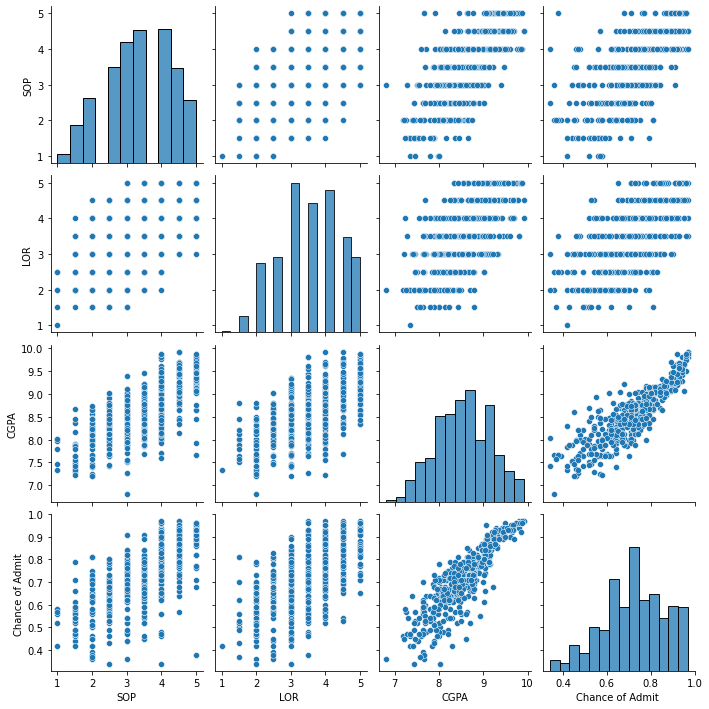

In [38]:
sns.pairplot(df.select_dtypes(include='float64'))

<AxesSubplot:>

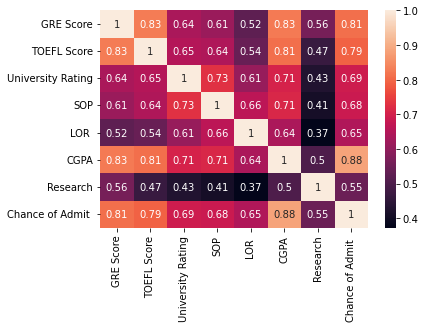

In [39]:
sns.heatmap(df.corr(),annot=True)

- Dependent column - 'Chance of admit' has higher correlation with CGPA
-  'Chance of admit' has second higher correlation with GRE score the TOFEL score

## CGPA vs Chance of Admit 

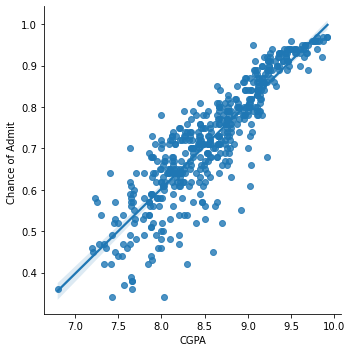

In [40]:
sns.lmplot(x='CGPA', y='Chance of Admit ', data=df)

- 'Chance of admit' is highly correlated with CGPA

In [41]:
data=df.copy()

In [42]:
# Feature binning: CGPA
bins=[6.5,7.5,8.5,9.5,11]
group=['second class','first class','first class & Distinction', 'Outstanding Perfomance']
data['CGPA_bin']= pd.cut(data['CGPA'],bins,labels=group)

In [43]:
# Feature binning: Chance of Admit
bins=[0,.5,.7,.8,.9,1]
group=['Low','Medium','Above Medium', 'High','Very High']
data['Chance_of_Admit_Bin']= pd.cut(data['Chance of Admit '],bins,labels=group)

In [44]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,CGPA_bin,Chance_of_Admit_Bin
Serial No.,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,Outstanding Perfomance,Very High
2,324,107,4,4.0,4.5,8.87,1,0.76,first class & Distinction,Above Medium
3,316,104,3,3.0,3.5,8.00,1,0.72,first class,Above Medium
4,322,110,3,3.5,2.5,8.67,1,0.80,first class & Distinction,Above Medium
5,314,103,2,2.0,3.0,8.21,0,0.65,first class,Medium
...,...,...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87,first class & Distinction,High
497,337,117,5,5.0,5.0,9.87,1,0.96,Outstanding Perfomance,Very High
498,330,120,5,4.5,5.0,9.56,1,0.93,Outstanding Perfomance,Very High


In [45]:
data['CGPA_bin'].value_counts()

first class & Distinction    236
first class                  213
Outstanding Perfomance        31
second class                  20
Name: CGPA_bin, dtype: int64

In [46]:
data['Chance_of_Admit_Bin'].value_counts()

Medium          174
Above Medium    145
High             81
Very High        61
Low              39
Name: Chance_of_Admit_Bin, dtype: int64

In [47]:
pd.crosstab(data['CGPA_bin'],data['Chance_of_Admit_Bin'])

Chance_of_Admit_Bin,Low,Medium,Above Medium,High,Very High
CGPA_bin,,,,,
second class,12,8,0,0,0
first class,26,135,51,1,0
first class & Distinction,1,31,94,78,32
Outstanding Perfomance,0,0,0,2,29


<Figure size 1080x576 with 0 Axes>

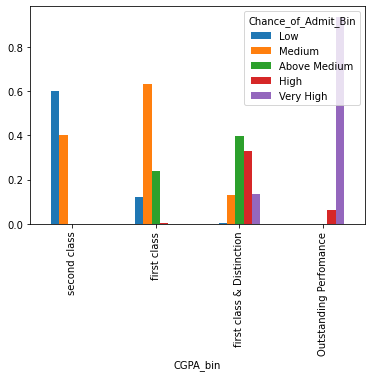

<Figure size 1080x576 with 0 Axes>

In [48]:

pd.crosstab(data['CGPA_bin'],data['Chance_of_Admit_Bin'],normalize='index').plot(kind='bar').figsize=(15,8)
plt.figure(figsize=(15,8))


- For Outstanding Perfomance students chance of admit for preffered university is high
- For second class students chance of admit is low
- For first class students chance of admit is medium
- For first class & Distinction students chance of admit is above medium

## Research count plot taking University Rating into consideration

Text(0.5, 1.0, 'Research count plot taking University Rating into consideration')

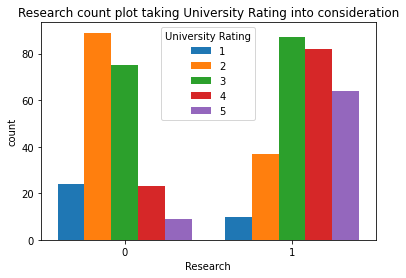

In [49]:
sns.countplot(x=df['Research'],hue=df['University Rating'],saturation=1)
plt.title("Research count plot taking University Rating into consideration")

## dependency of desire parameter -Chance of Admit on GRE score with diffrent Research

Text(0.5, 1.0, 'Chance of Admit vs GRE score')

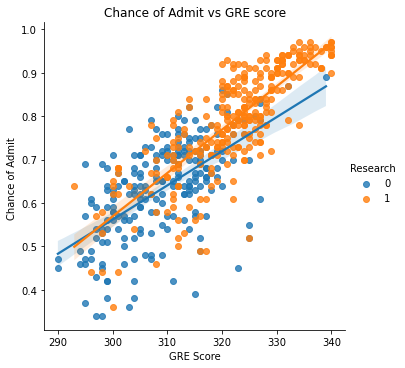

In [50]:
sns.lmplot(x='GRE Score',y='Chance of Admit ',data=df,hue='Research')
plt.title('Chance of Admit vs GRE score')

> linear model that directly relate the desire parameter Chance of Admit with GRE score

## dependency of desire parameter -Chance of Admit on TOEFL Score with diffrent Research

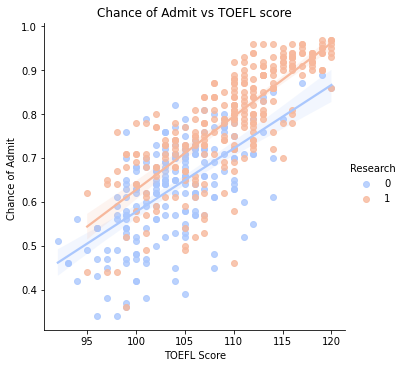

In [51]:
sns.lmplot(x='TOEFL Score',y='Chance of Admit ',data=df,hue='Research',palette='coolwarm')
plt.title('Chance of Admit vs TOEFL score');

> linear model that directly relate the desire parameter Chance of Admit with TOEFL score

## dependency of desire parameter -Chance of Admit on CGPA with diffrent Research

Text(0.5, 1.0, 'Chance of Admit vs CGPA')

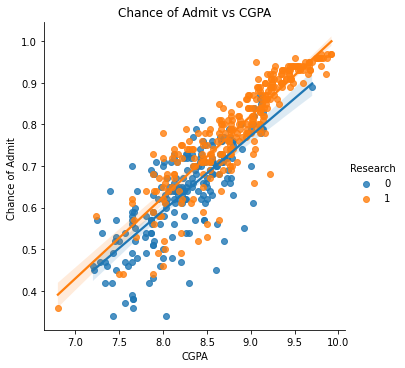

In [52]:
sns.lmplot(x='CGPA',y='Chance of Admit ',data=df,hue='Research')
plt.title('Chance of Admit vs CGPA')

> linear model that directly relate the desire parameter Chance of Admit with CGPA

# Predictive Analysis

### Standardization of data 

In [53]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler to the dataset
scaler.fit(df)

# Transform the dataset to have zero mean and unit variance
X_standardized = scaler.transform(df)
X=pd.DataFrame(X_standardized, columns=[
 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '])

In [54]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [55]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582


In [56]:
y=X['Chance of Admit ']
x=X.drop(['Chance of Admit '],axis=1)

In [57]:
#x['x0']=1
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152


In [58]:
y

0      1.406107
1      0.271349
2     -0.012340
3      0.555039
4     -0.508797
         ...   
495    1.051495
496    1.689797
497    1.477030
498    0.058582
499    0.838728
Name: Chance of Admit , Length: 500, dtype: float64

### Splitting the Data for Training and Testing

In [59]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=100,)

In [60]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [61]:
y_test

69     0.413194
29    -1.288944
471   -0.579720
344   -1.785400
54    -0.154185
         ...   
308   -0.225108
171    1.193340
457   -2.494624
75    -0.012340
311    0.838728
Name: Chance of Admit , Length: 150, dtype: float64

In [62]:
y_train

153    0.484116
84     1.547952
310    0.271349
494   -0.296030
126    0.909651
         ...   
343   -0.934332
359    0.625961
323   -0.721564
280   -0.296030
8     -1.572633
Name: Chance of Admit , Length: 350, dtype: float64

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train) # training stage

LinearRegression()

In [64]:
X_train.shape

(350, 7)

In [65]:
y_train.shape

(350,)

In [66]:
y_hat = model.predict(X_train)
print("Predicted Y Values")
print(y_hat[:3])
print("Actualy")
print(y_train[:3])

Predicted Y Values
[0.08550232 1.43262567 0.15408964]
Actualy
153    0.484116
84     1.547952
310    0.271349
Name: Chance of Admit , dtype: float64


In [67]:
model.score(X_train,y_train) # R^2 score

0.8132510822066584

- model has test accuracy 81.3 %

In [68]:
print(model.coef_)
print(model.intercept_)

[0.090411   0.15138317 0.04242884 0.00388195 0.11296889 0.54621902
 0.09713738]
-0.024866812538764875


In [69]:
w=np.zeros((7,))
w=model.coef_
w0=model.intercept_
print('w:',w)
print('w0:',w0)

w: [0.090411   0.15138317 0.04242884 0.00388195 0.11296889 0.54621902
 0.09713738]
w0: -0.024866812538764875


In [70]:
w[5]

0.5462190201662892

In [71]:
w=np.reshape(w,(1,len(w)))
w.shape

(1, 7)

### Model

In [72]:
y_hat=np.dot(w,np.transpose(X_train))+w0
y_hat.shape

(1, 350)

In [73]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [74]:
y_hat

array([[ 8.55023226e-02,  1.43262567e+00,  1.54089639e-01,
        -5.70140696e-01,  8.69529436e-01,  1.33924826e+00,
         7.41409059e-01, -1.17428786e+00, -1.07093828e+00,
         1.36712736e-01,  1.06977143e+00, -1.73385112e-01,
        -3.34531841e-01, -1.31133466e+00,  1.33035350e-01,
        -2.38221894e-02, -1.04109283e+00,  8.66305650e-01,
        -9.15541443e-01, -6.01008990e-01,  5.79726122e-02,
         1.77649090e+00, -2.04715354e-01,  7.88278815e-01,
        -4.02561995e-01,  8.06078551e-01,  3.88423081e-01,
        -1.45788435e+00, -2.83982298e-01, -8.09610395e-01,
        -1.91889028e+00,  1.51133518e+00,  1.06345798e+00,
        -1.23815816e+00,  6.46926516e-01, -2.65885746e-01,
         1.10996644e+00,  5.96287569e-01,  3.25903385e-01,
        -8.85667491e-01,  2.94001644e-01, -1.56785369e+00,
        -1.15406653e+00, -1.47711776e+00,  1.07711273e-01,
        -1.52809579e+00, -1.43103905e+00, -5.82759951e-01,
         1.83281801e-01, -9.06212261e-01,  1.03664898e+0

In [75]:
w

array([[0.090411  , 0.15138317, 0.04242884, 0.00388195, 0.11296889,
        0.54621902, 0.09713738]])

#### Here w[5] = 0.54621902  is the highest coefficient. So, the column CGPA is feature importance

### Display model coefficients with column names

In [76]:
w=model.coef_
columns=np.array(x.columns)
for i in range(len(w)):
    print(columns[i],'  :', w[i])

GRE Score   : 0.09041100444228006
TOEFL Score   : 0.1513831691346033
University Rating   : 0.04242884182922707
SOP   : 0.003881950858449973
LOR    : 0.11296889349260139
CGPA   : 0.5462190201662892
Research   : 0.09713738365964267


## Scatterplot of y_predicted and y_actual


<AxesSubplot:xlabel='Chance of Admit '>

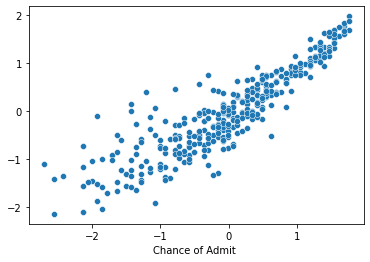

In [77]:
#sns.scatterplot(data=df,x=y_train,y=y_hat)
sns.scatterplot(x=y_train,y=model.predict(X_train))


#### Scatterplot of y_predicted and y_actual shows a linear relationship

## Distribution of predicted and actual


In [78]:
y_test

69     0.413194
29    -1.288944
471   -0.579720
344   -1.785400
54    -0.154185
         ...   
308   -0.225108
171    1.193340
457   -2.494624
75    -0.012340
311    0.838728
Name: Chance of Admit , Length: 150, dtype: float64

In [79]:
y_test_pred=model.predict(X_test)

In [80]:
y_test_pred

array([ 0.97607234, -1.77440902, -0.66906869, -1.9331819 , -0.54505807,
        0.95824628, -0.94972795, -0.38151383,  0.65203107, -0.24316108,
       -0.39839899, -0.81207714,  1.22732156,  0.23598369, -0.59991421,
       -1.53965093, -0.9101761 ,  0.18894426, -1.16557055, -0.1271814 ,
        1.24135734, -0.77850785,  0.90478202,  0.74453432,  1.94795604,
       -0.84631611, -0.27988704,  1.51993933,  1.11697103, -0.14749348,
        0.48904655,  0.92582056,  0.19837706, -1.20538677,  0.1360968 ,
        0.42493282,  0.53947845, -1.02554683, -1.29212737, -0.14039671,
        1.60489426, -0.9149858 ,  0.81765601,  0.45935986,  0.64659667,
       -1.23477205, -0.86801973,  1.08201637,  1.62801231, -0.86830766,
        0.67853488, -0.08336846,  0.60338862,  1.90116695, -0.52067838,
        0.96080708, -0.71695757,  1.24316368,  0.35900833,  0.10310335,
       -0.24232526, -0.67403037, -1.71549464,  1.15696009, -0.49159212,
       -0.26258037, -0.11135112, -1.83187365,  0.82665037,  0.88

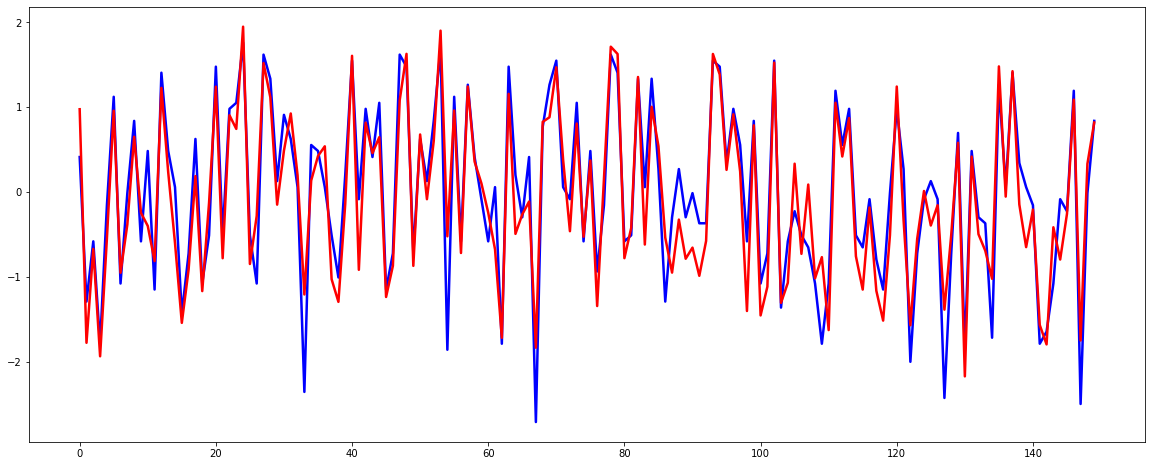

In [81]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.plot(c,y_test,color="blue",  linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred,color="red",  linewidth=2.5, linestyle="-")


- We can see that actual and predicted values are almost same

## Distribution of error

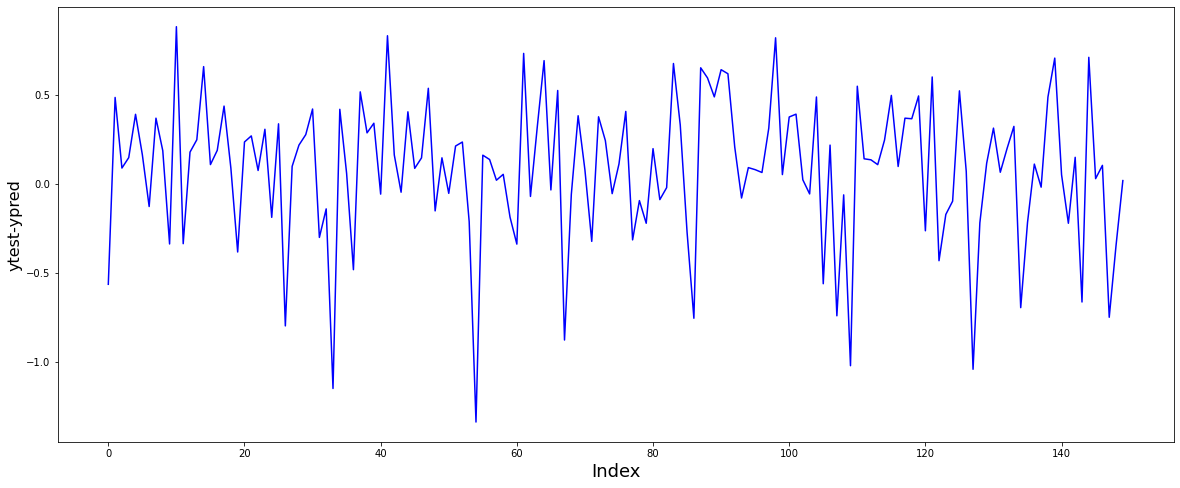

In [82]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.plot(c,y_test-y_test_pred,color="blue")
plt.xlabel('Index', fontsize=18)       # X-label
plt.ylabel('ytest-ypred', fontsize=16) # Y-label
plt.show()


- Residuals are in range of -0.15 to 0.1

## Testing the assumptions of the linear regression model 

### 1.Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) 

In [83]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [84]:
def multi_collinear():
    vif_1st=[]
    for i in X_train.columns:
        X1=X_train[i].values
        X2=X_train.drop(i,axis=1)
        X2=X2.values
        model.fit(X2, X1)
        X1_hat=model.predict(X2)
        den=sum(((X1-X1.mean())**2))
        num=sum((X1-X1_hat)**2)
        score=1-(num/den)
        vif=1/(1-(score))
        vif_1st.append(vif)
    return vif_1st
multi_collinear()

[4.75835961175147,
 3.726721622339553,
 2.4820604939391697,
 2.7333995945727474,
 1.9701828330346352,
 4.705215422225117,
 1.48693661115061]

### VIF values of all columns are less than 5. So has less multicollinearity

### 2.The mean of residuals is nearly zero 

In [85]:
y_test_pred

array([ 0.97607234, -1.77440902, -0.66906869, -1.9331819 , -0.54505807,
        0.95824628, -0.94972795, -0.38151383,  0.65203107, -0.24316108,
       -0.39839899, -0.81207714,  1.22732156,  0.23598369, -0.59991421,
       -1.53965093, -0.9101761 ,  0.18894426, -1.16557055, -0.1271814 ,
        1.24135734, -0.77850785,  0.90478202,  0.74453432,  1.94795604,
       -0.84631611, -0.27988704,  1.51993933,  1.11697103, -0.14749348,
        0.48904655,  0.92582056,  0.19837706, -1.20538677,  0.1360968 ,
        0.42493282,  0.53947845, -1.02554683, -1.29212737, -0.14039671,
        1.60489426, -0.9149858 ,  0.81765601,  0.45935986,  0.64659667,
       -1.23477205, -0.86801973,  1.08201637,  1.62801231, -0.86830766,
        0.67853488, -0.08336846,  0.60338862,  1.90116695, -0.52067838,
        0.96080708, -0.71695757,  1.24316368,  0.35900833,  0.10310335,
       -0.24232526, -0.67403037, -1.71549464,  1.15696009, -0.49159212,
       -0.26258037, -0.11135112, -1.83187365,  0.82665037,  0.88

In [86]:
y_test

69     0.413194
29    -1.288944
471   -0.579720
344   -1.785400
54    -0.154185
         ...   
308   -0.225108
171    1.193340
457   -2.494624
75    -0.012340
311    0.838728
Name: Chance of Admit , Length: 150, dtype: float64

In [87]:
Residuals=np.array(y_test-y_test_pred)
Residuals

array([-0.56287849,  0.48546547,  0.08934906,  0.14778161,  0.39087279,
        0.16417149, -0.12644842,  0.36917334,  0.18669714, -0.33655855,
        0.88251524, -0.33502162,  0.17878578,  0.24813255,  0.65849611,
        0.10886259,  0.18861168,  0.43701677,  0.08939417, -0.38161584,
        0.23567239,  0.26971061,  0.07579097,  0.30696106, -0.18723674,
        0.33751887, -0.79628933,  0.09893518,  0.21821392,  0.27699777,
        0.42060405, -0.29985953, -0.13979516, -1.14739266,  0.41894184,
        0.05918342, -0.48089656,  0.51674959,  0.28687339,  0.34082338,
       -0.05694214,  0.83172291,  0.16291698, -0.04616601,  0.40489871,
        0.08767329,  0.14645531,  0.53685815, -0.15098258,  0.14674324,
       -0.05257385,  0.21287274,  0.23533959, -0.21137004, -1.3356443 ,
        0.16161069,  0.13723794,  0.02109888,  0.05418552, -0.18636624,
       -0.33739438,  0.73261227, -0.06990565,  0.32006964,  0.6920188 ,
       -0.03344969,  0.52454498, -0.87551773, -0.05884456,  0.38

In [88]:
np.mean(Residuals)

0.0828893751292083

#### We can see that  mean of residuals is approxmatly equals to zero

If residuals is close to zero, it suggests that the model is not consistently overestimating or underestimating the outcome variable, indicating that the model has a good balance between bias and variance.

### 3.Linearity of variables

C:\Users\I Am Guest\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


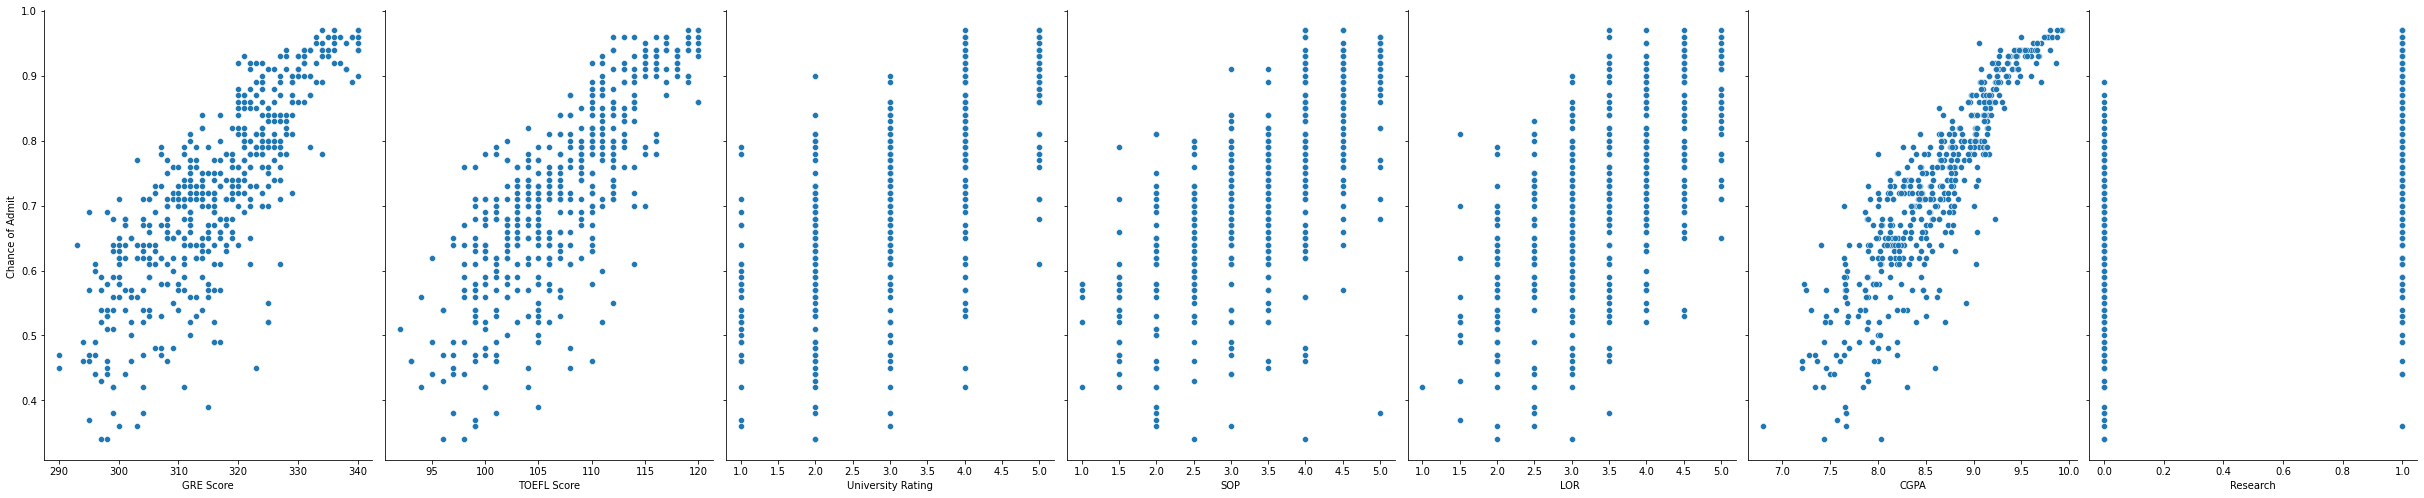

In [89]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'], y_vars='Chance of Admit ',size=7, aspect=0.7, kind='scatter')

# OR

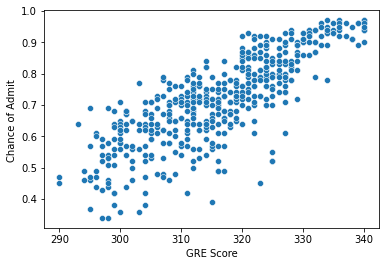

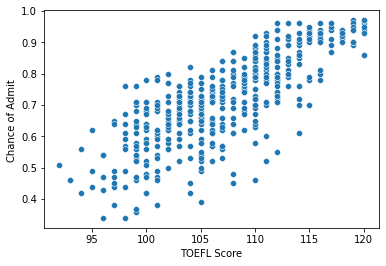

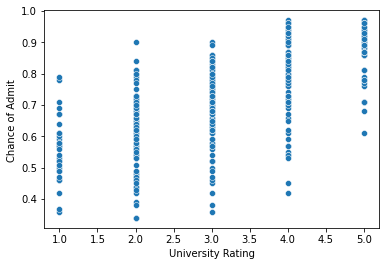

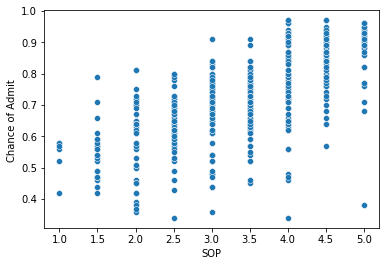

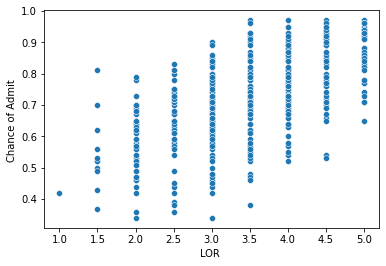

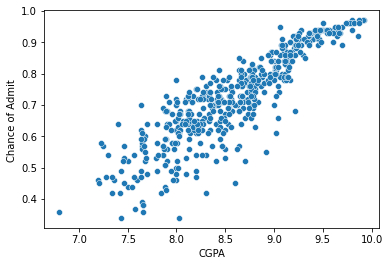

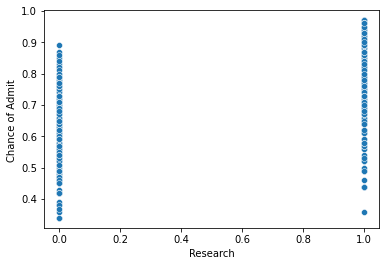

In [90]:
for i in df.columns:
    if i==df.columns[-1]:
        break
    else:
        fig,ax=plt.subplots(nrows=1,ncols=1)
        sns.scatterplot(x=df[i],y=df["Chance of Admit "])

### We can see that all features are are linear to dependent variable 'Chance of admit'

### 4.Test for Homoscedasticity

In [91]:
np.var(Residuals)

0.16460873092912473

#### We can see the variance of residuals are very low . So it obey Homocedasticty

## OR

### how much the predicted values differ from the actual values (the bias or error), the difference between the predicted and actual values as a scatter plot.

In [92]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
69,1.021637,1.285102,0.775582,1.137360,0.558125,0.965827,0.886405
29,-0.573563,-1.348304,-0.975168,-1.892906,-1.605151,-2.112585,-1.128152
471,-0.484941,-0.689952,-0.099793,-1.387862,0.558125,-0.805087,-1.128152
344,-1.902897,-1.842067,-0.975168,-1.892906,-1.605151,-2.046382,-1.128152
54,0.489904,0.462163,-0.099793,-0.377773,0.017306,-0.954043,-1.128152
...,...,...,...,...,...,...,...
308,-0.396319,0.132987,-0.099793,0.127271,-0.523513,-0.076861,-1.128152
171,1.553371,1.614278,1.650957,0.632315,1.098944,0.816871,0.886405
457,-1.902897,-1.348304,-1.850542,-1.387862,-2.145970,-1.665719,-1.128152
75,1.110260,1.120514,-0.975168,-1.387862,0.558125,-0.027209,0.886405


In [93]:
m=X_test.copy()
m['Residuals']=Residuals
m['predicted_y']=y_test_pred
m

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Residuals,predicted_y
69,1.021637,1.285102,0.775582,1.137360,0.558125,0.965827,0.886405,-0.562878,0.976072
29,-0.573563,-1.348304,-0.975168,-1.892906,-1.605151,-2.112585,-1.128152,0.485465,-1.774409
471,-0.484941,-0.689952,-0.099793,-1.387862,0.558125,-0.805087,-1.128152,0.089349,-0.669069
344,-1.902897,-1.842067,-0.975168,-1.892906,-1.605151,-2.046382,-1.128152,0.147782,-1.933182
54,0.489904,0.462163,-0.099793,-0.377773,0.017306,-0.954043,-1.128152,0.390873,-0.545058
...,...,...,...,...,...,...,...,...,...
308,-0.396319,0.132987,-0.099793,0.127271,-0.523513,-0.076861,-1.128152,0.029908,-0.255016
171,1.553371,1.614278,1.650957,0.632315,1.098944,0.816871,0.886405,0.104448,1.088893
457,-1.902897,-1.348304,-1.850542,-1.387862,-2.145970,-1.665719,-1.128152,-0.747839,-1.746785
75,1.110260,1.120514,-0.975168,-1.387862,0.558125,-0.027209,0.886405,-0.345009,0.332669


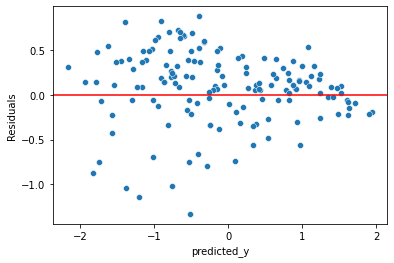

In [94]:
sns.scatterplot(x='predicted_y',y='Residuals',data=m)
plt.axhline(y=0, color='r', linestyle='-')

- We can see that there is homoscadacity obays
- From this plot we can visualize the amount of bias.it is too low, its ranges from -0.15 to 0.1

### 5.Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) 

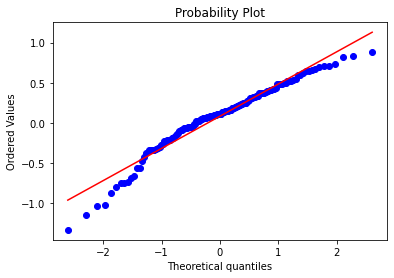

In [95]:
stats.probplot(Residuals,dist='norm',plot=plt)
plt.show()

<AxesSubplot:ylabel='Density'>

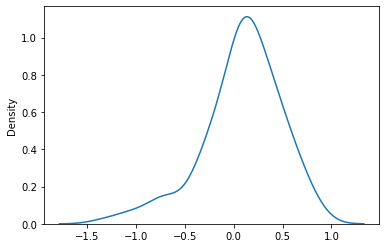

In [96]:
sns.kdeplot(Residuals)

## We can see that almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line

## From linear Regression assumptions we can conclude that -

Based on the given assumptions, we can conclude that our linear regression model meets the basic assumptions of linear regression. However, it is possible that the model may still have high variance or overfitting, which can be addressed through regularization techniques like Lasso and Ridge regression.

To determine whether we need to use regularization techniques like Lasso and Ridge in cross-validation, we need to consider the bias-variance tradeoff. If the model has high variance, we need to use regularization techniques to reduce the variance and improve the model's ability to generalize to new data. If the model has high bias, we need to increase the complexity of the model or collect more data to improve the model's ability to capture the underlying relationships in the data.

Therefore, to determine whether we need to use Lasso and Ridge in cross-validation, we need to evaluate the model's performance on a validation set or through cross-validation and analyze the bias-variance tradeoff. If the model has high variance, we should consider using regularization techniques like Lasso and Ridge to improve the model's generalization ability. If the model has high bias, we need to explore other options such as increasing the complexity of the model or collecting more data.

## Model performance evaluation 

### mean absolute error & Root mean squired error

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.17147937943843536
r_square_value : 0.8355717634850118


### R2

In [98]:
model = LinearRegression()
model.fit(X_train,y_train)
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8355717634850118

### Train and test performances are checked

In [99]:
print('Train data accuracy =', model.score(X_train,y_train))

Train data accuracy = 0.8132510822066584


In [100]:
print('Test data accuracy =',model.score(X_test,y_test))

Test data accuracy = 0.8355717634850118


### test data have more accuracy than train data

- From this we can conclude that-
> test data have more accuracy than train data. So data is not overfit. it is balanced fit

## Checking Unwanted Features in data by VIF and OLS method(feature Hypothesis) and check Accuracy

###  Checking for P-value Using STATSMODELS

In [131]:
h=df.drop('Chance of Admit ',axis=1)
h

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [132]:
import statsmodels.api as sm
X_sm = h
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_sm = sm.add_constant(X_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y,X_sm).fit()

# print the coefficients
lm_1.params

const               -14.608157
Serial No.            0.000616
GRE Score             0.013629
TOEFL Score           0.022644
University Rating     0.037705
SOP                   0.032384
LOR                   0.105782
CGPA                  0.819552
Research              0.159756
dtype: float64

In [133]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     298.4
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          4.16e-183
Time:                        00:34:52   Log-Likelihood:                -267.38
No. Observations:                 500   AIC:                             552.8
Df Residuals:                     491   BIC:                             590.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -14.6082      0.73

- By OLS method we can see that University Rating ,SOP are insignificant features

## Check VIF including constent feature

In [146]:
X_sm

,const,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,1,337,118,4,4.5,4.5,9.65,1
1,1.0,2,324,107,4,4.0,4.5,8.87,1
2,1.0,3,316,104,3,3.0,3.5,8.00,1
3,1.0,4,322,110,3,3.5,2.5,8.67,1
4,1.0,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...,...
495,1.0,496,332,108,5,4.5,4.0,9.02,1
496,1.0,497,337,117,5,5.0,5.0,9.87,1
497,1.0,498,330,120,5,4.5,5.0,9.56,1
498,1.0,499,312,103,4,4.0,5.0,8.43,0


In [135]:
X_c=pd.DataFrame(data=X_sm)
X_c['const'].value_counts()

1.0    500
Name: const, dtype: int64

In [136]:
X=x.copy()
X['constent']=1
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,constent
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,1
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,1
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,1
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,1
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,1


In [137]:
p=list(df['Chance of Admit '].values)

In [138]:
X['Chance of Admit ']=p
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,constent,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1,0.92
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,1,0.76
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,1,0.72
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,1,0.80
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,1,0.65
...,...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1,0.87
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1,0.96
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1,0.93
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,1,0.73


In [139]:
import statsmodels.api as sm
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x.astype(float)).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [140]:
vif_cal(X,'Chance of Admit ')

,Var,Vif
5,CGPA,4.78
0,GRE Score,4.46
1,TOEFL Score,3.90
3,SOP,2.84
2,University Rating,2.62
4,LOR,2.03
6,Research,1.49
7,constent,1.00


- By VIF method we can see that 'constent' feature are significant

> So, by checking both ols and vif we can see that all features are significant

In [147]:
X_sm

,const,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,1,337,118,4,4.5,4.5,9.65,1
1,1.0,2,324,107,4,4.0,4.5,8.87,1
2,1.0,3,316,104,3,3.0,3.5,8.00,1
3,1.0,4,322,110,3,3.5,2.5,8.67,1
4,1.0,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...,...
495,1.0,496,332,108,5,4.5,4.0,9.02,1
496,1.0,497,337,117,5,5.0,5.0,9.87,1
497,1.0,498,330,120,5,4.5,5.0,9.56,1
498,1.0,499,312,103,4,4.0,5.0,8.43,0


In [148]:
X_sm.drop('const',axis=1,inplace=True)
X_sm['Chance of Admit ']=p
X_sm

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [149]:
vif_cal(X_sm,'Chance of Admit ')

,Var,Vif
1,GRE Score,1328.23
2,TOEFL Score,1230.78
6,CGPA,952.91
4,SOP,36.16
5,LOR,31.23
3,University Rating,20.93
0,Serial No.,4.16
7,Research,2.87


In [151]:
X_sm1=X_sm.drop(['Chance of Admit ','Serial No.'],axis=1)
lm_1 = sm.OLS(y,X_sm1).fit()
print(lm_1.summary())

                                 OLS Regression Results                                
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.689
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                              156.1
Date:                Sat, 22 Apr 2023   Prob (F-statistic):                   9.68e-121
Time:                        00:57:51   Log-Likelihood:                         -417.38
No. Observations:                 500   AIC:                                      848.8
Df Residuals:                     493   BIC:                                      878.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

## Checking correlation Among data

<AxesSubplot:>

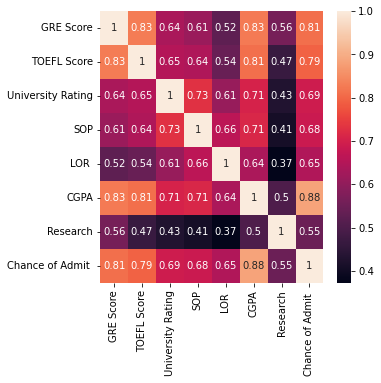

In [110]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(),annot = True)

- By correlation CGPA, GRE score, TOFEL score are highly correlated
- So we take any of these feature 
> Remove  GRE score, TOFEL score

### Implementing the results and running the model again

In [111]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'constent', 'Chance of Admit '],
      dtype='object')

In [113]:
# Removing University Rating,GRE Score,SOP  from our dataset
X_train_new = X_train[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]
X_test_new = X_test[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

In [114]:
# Model building
model.fit(X_train_new,y_train)

LinearRegression()

In [115]:
# Making predictions
y_pred_new = model.predict(X_test_new)

Text(0, 0.5, 'Sales')

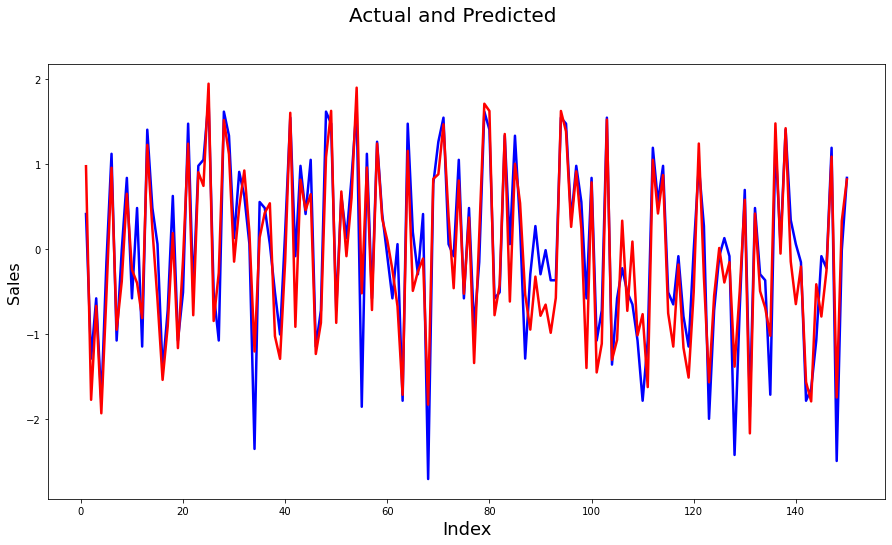

In [116]:
#Actual vs Predicted
c = [i for i in range(1,151,1)]
fig = plt.figure(figsize=(15,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_new, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)   

In [117]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [118]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.17147937943843536
r_square_value : 0.8355717634850118


#### Accuracy decrese by small amount when removing  features GRE Score,TOFEL score
#### We only need to remove features when both ols method and vif score of features are wrong

> We can see that Train data and test data gives higher accuracy. Here we can't conclude that For unseen data we get higher accuracy. So we nee to check Crossvalidation techniques to say accuratly minimum how much accuracy can give for unseen data

## Generalisation
## Ridge and Lasso Regression


Let's now try predicting Chance of admit, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression


In [ ]:

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()


In [ ]:

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 



In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()


In [ ]:
cv_results.loc[cv_results.mean_test_score==cv_results.mean_test_score.max()]

In [ ]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2 value')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


- By hyperparameter tuning best alpha =0.1

In [ ]:

alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


In [ ]:
y_pred_ridge=ridge.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_ridge)
r_squared = r2_score(y_test, y_pred_ridge)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

- In Ridge regression By 5 fold cross validation method we can see that our model can accuratly predict at confidently above 83.68%


## Lasso



In [ ]:
lasso = Lasso()

In [ ]:
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

In [ ]:


cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


In [ ]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')


In [ ]:

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [ ]:
cv_results.loc[cv_results.mean_test_score==cv_results.mean_test_score.max()]

- By hyperparameter tuning best alpha =0.01

In [ ]:

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_

In [ ]:
y_pred_lasso=lasso.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_lasso)
r_squared = r2_score(y_test, y_pred_lasso)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

- In lasso regression By 5 fold cross validation method we can see that our model can accuratly predict at confidently above 83.64%

> From lasso and ridge Regression we can see that accuracy obtained is almost same. ridge Regression accuracy is highest

## Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

In [ ]:
X_train

In [ ]:
X_train2.shape

In [ ]:

print(poly_clf.score(X_test2, y_test))

#### Out off sample (testing) R^2 is our measure of sucess and does improve

# Insights & Recommendations

## Insights from Visualizations

- Chance of admit increses with increse in values of independent variables . most correlated freature is CGPA
- From the heatmap itself we see the correlation between all the parameters and in case of 'Chance of Admit' it is highest with 'CGPA' parameter.
- From Pairplot we came to know that 'University Rating', 'SOP', 'LOR ' & 'Research' are all categorical features and hence later on we have plotted count plots for them.
- Various plots (countplot, histplot etc.) showcased the distribution of the respective parameter values in the data
- At last regression plot showed the linear model that directly relate the desire parameter (Chance of Admit) with other parameters
- Among students who have done research vs those who did not, 56 % said Yes and 44 % said No
- More than 50% of the data has a university rating of 3 or 2
- A strong positive relationship exists between Chance of admit and numerical variables (GRE & TOEFL score and CGPA).



## Predictive Analysis Insights

- Test data (83.5%) has more accuracy than Train data (81.3%). So it is balanced fit.
- We can see that actual and predicted values of train data are almost same.
- From model weights CGPA has the most feature importance, TOFEL score is second most.
- By checking OLS and VIF Score there is no common unwanted feature to remove.
- After removing of higher correlated features there is no improvement in accuracy. So all features are importent 
- We can conclude that our linear regression model meets the basic assumptions of linear regression.
- However, it is possible that the model may still have high variance or overfitting, which can be addressed through regularization techniques like Lasso and Ridge regression.
- From lasso and ridge Regression we can see that accuracy obtained is almost same. ridge Regression accuracy is highest (83.68%)
- There no improvement in accuracy by checking Other models such as Polynomial Regression

## Recommendations

- CGPA and Research are most two variables which are important in making the prediction for Chance of Admit. So, improving these marks will get into preffered university for applicants 
- CGPA is the most important varibale in making the prediction for the Chance of Admit.
- All features are influencing the chance of Admit
- For higher University rating students need higher marks to increse chance of admission
- A higher value of LOR and SPO will also increases the chance of admission for the student

# Testing the assumptions of the linear regression model

### Linear regression is the simplest machine learning algorithm of predictive analysis. Linear regression algorithm shows a linear relationship between a dependent (y variable) and one or more independent (x variable) variables hence it is known as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

### The theory of linear regression is based on certain statistical assumptions. It is crucial to check these regression assumptions before modeling the data using the linear regression approach.

Mainly there are 7 assumptions taken while using Linear Regression:

## Linear Model
* No Multicolinearlity in the data
* Homoscedasticity of Residuals or Equal Variances
* No Autocorrelation in residuals
* Number of observations Greater than the number of predictors
* Each observation is unique
Predictors are distributed Normally
 
## Linear Model
* According to this assumption, the relationship between the independent and dependent variables should be linear. The reason behind this relationship is that if the relationship will be non-linear which is certainly is the case in the real-world data then the predictions made by our linear regression model will not be accurate and will vary from the actual observations a lot.


## No Multicolinearlity in the data 

* If the predictor variables are correlated among themselves, then the data is said to have a multicollinearity problem
*  But why is this a problem? The answer to this question is that high collinearity means that the two variables vary very similarly and contain the same kind of information. This will leads to redundancy in the dataset. Due to redundancy, only the complexity of the model increase, and no new information or pattern is learned by the model. We generally try to avoid highly correlated features even while using complex models.

* We can identify highly correlated features using scatter plots or heatmap

## Homoscedasticity of Residuals or Equal Variances

* Homoscedasity is the term that states that the spread residuals which we are getting from the linear regression model should be homogeneous or equal spaces. 
* If the spread of the residuals is heterogeneous then the model is called to be an unsatisfactory model.

One can easily get an idea of the homoscedasticity of the residuals by plotting a scatter plot of the residual data.
## NoAutocorrelation in residuals

* One of the critical assumptions of multiple linear regression is that there should be no autocorrelation in the data. When the residuals are dependent on each other, there is autocorrelation. This factor is visible in the case of stock prices when the price of a stock is not independent of its previous one.
* plotting the variables on a graph like a scatterplot or a line plot allows you to check for autocorrelations if any.


## NO of observations Greater than the number of predictors

* for a better-performing model, the number of training data or observations should be always greater than the number of test or prediction data.
* However greater the number of observations better the model performance. Therefore, to build a linear regression model you must have more observations than the number of independent variables (predictors) in the data set. The reason behind this can be understood by the curse of dimensionality.

 
## Each observation is unique

*  It is also important to ensure that each observation is independent of the other observation.  Meaning each observation in the data set should be measured separately on a unique occurrence of the event that caused the observation.


For example:

If you want to include two observations to measure the density of a liquid with 5 Kg mass and 5 L volume, then you must experiment twice to measure the density for the two independent observations. Such observations are called replicates of each other. It would be wrong to use the same measurement for both observations, as you will disregard the random error.

## Predictors are distributed Normally
*  This assumption ensures that you have equally distributed observations for the range of each predictor. So at the end of the model training, the predicted values for each test data should be a normal distribution. One can get an idea of the distribution of the predicted values by plotting density, KDE, or QQ plots for the predictions.


 
# Linearity of variables

* A residual plot is a scatter plot of the residuals (prediction errors) on the vertical axis and the predictor values on the 
horizontal axis. To check for linearity of variables using a residual plot, you should look for the following:

1.Randomness: The residuals should be randomly distributed around zero. If there is a pattern in the residual plot, it indicates 
    that the relationship between the predictor and the response variable is non-linear.

2.Equal Variance: The residuals should have roughly equal variance for all levels of the predictor. If the variance of the 
    residuals changes along the predictor, it suggests non-constant error variance and non-linearity.

3.Independence: The residuals should be independent of each other. If there is a clear pattern in the residual plot, such as a 
    curve or a fan shape, it suggests that the residuals are not independent and the relationship between the predictor and the
    response variable is non-linear.

If the residual plot exhibits randomness, equal variance, and independence, then the linearity assumption is likely satisfied
and a linear regression model is appropriate.

### What’s the trade-off between bias and variance?

Bias is error due to erroneous or overly simplistic assumptions in the learning algorithm you’re using. This can lead to the model underfitting your data, making it hard for it to have high predictive accuracy and for you to generalize your knowledge from the training set to the test set.

Variance is error due to too much complexity in the learning algorithm you’re using. This leads to the algorithm being highly sensitive to high degrees of variation in your training data, which can lead your model to overfit the data. Y